In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [31]:
    df = pd.read_csv('penguins.csv')

    df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,NaN,NaN,NaN,NaN,NaN
4,36.7,19.3,193.0,3450.0,FEMALE


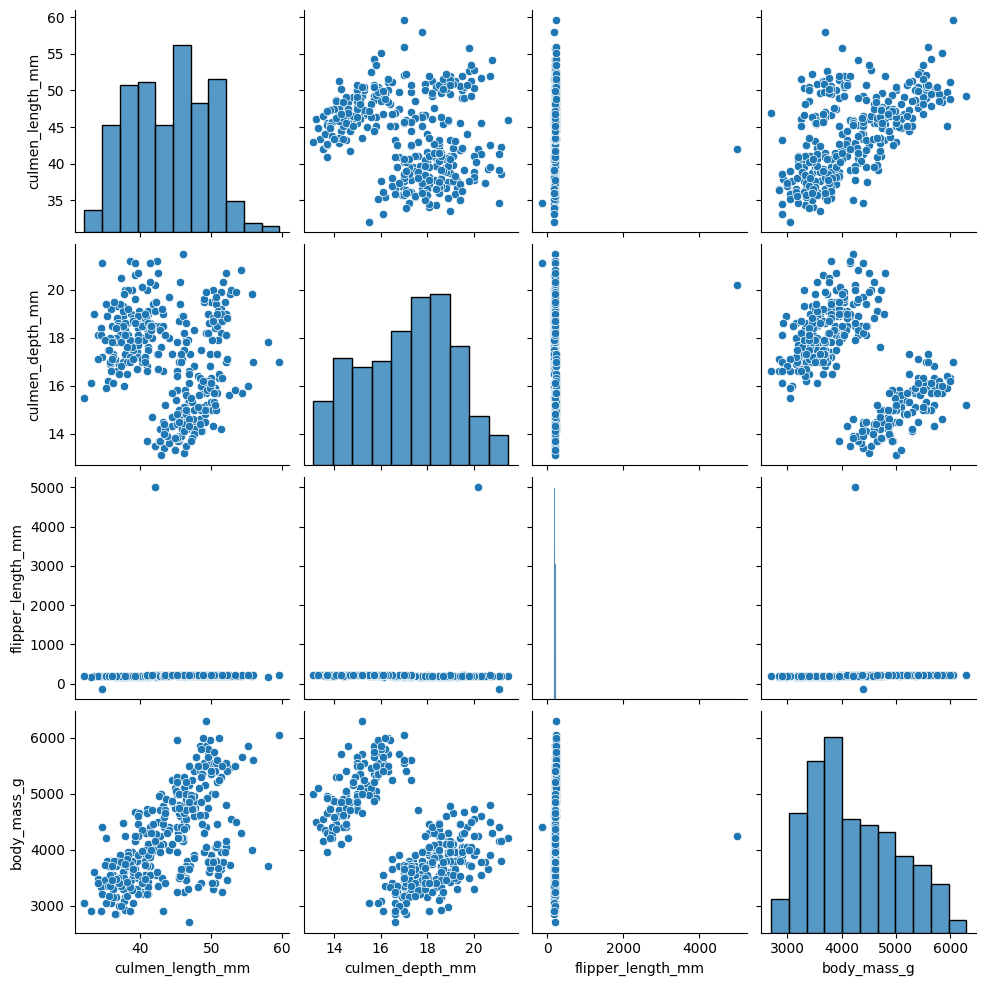

In [32]:
sns.pairplot(df)

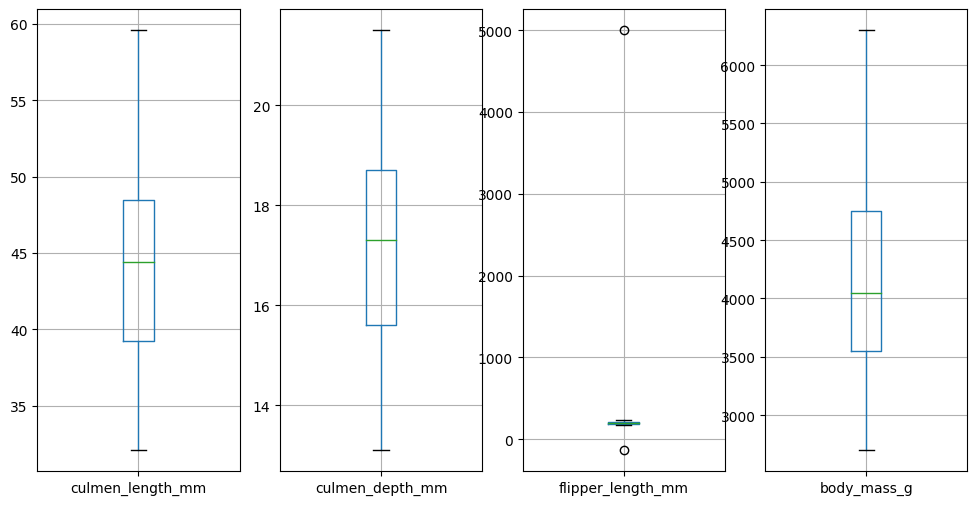

In [33]:
variables = ['culmen_length_mm','culmen_depth_mm','flipper_length_mm','body_mass_g']

n_vars = len(variables)

fig, axes = plt.subplots(ncols=n_vars, figsize=(12,6))



for i, var in enumerate(variables):
    ax = axes[i]
    df.boxplot(column=var, ax=ax)

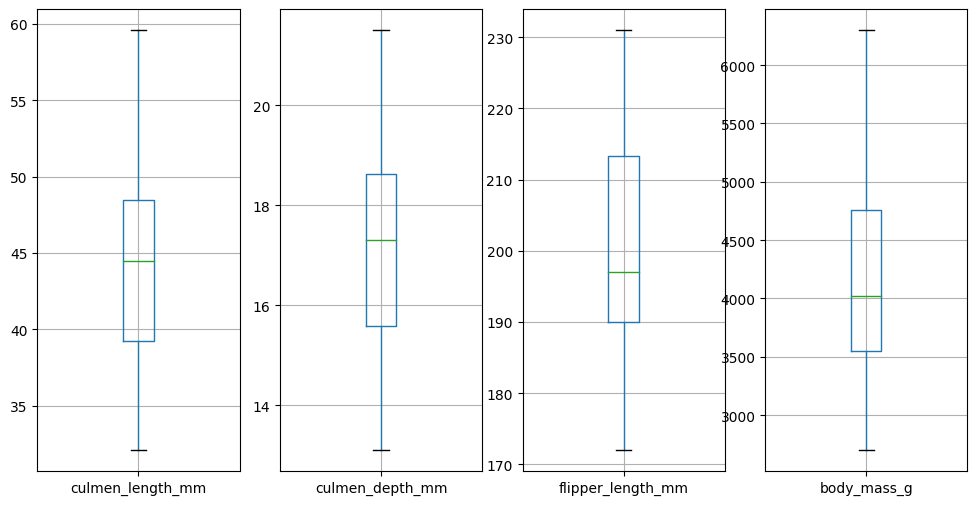

In [34]:
def remove_IQR(df, columns):
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        df = df[(df[column] > lower_bound) & (df[column] < upper_bound)]
    return df

columns_to_check = ['culmen_length_mm','culmen_depth_mm','flipper_length_mm','body_mass_g']
df_cleaned = remove_IQR(df, columns_to_check)


variables = ['culmen_length_mm','culmen_depth_mm','flipper_length_mm','body_mass_g']

n_vars = len(variables)

fig, axes = plt.subplots(ncols=n_vars, figsize=(12,6))



for i, var in enumerate(variables):
    ax = axes[i]
    df_cleaned.boxplot(column=var, ax=ax)

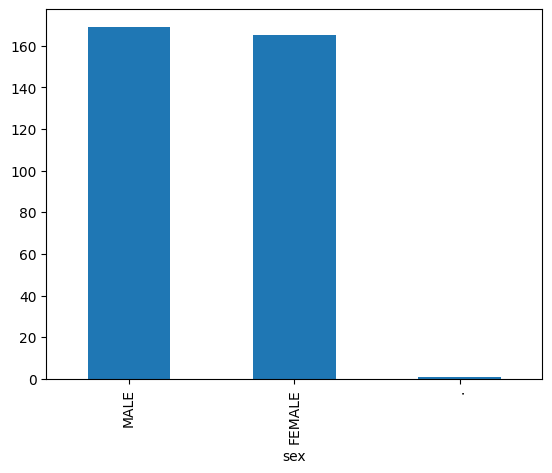

In [35]:
variables = ['sex']

for var in variables:
    values = df[var].value_counts()
    values.plot(kind='bar')
    plt.show()

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   342 non-null    float64
 1   culmen_depth_mm    342 non-null    float64
 2   flipper_length_mm  342 non-null    float64
 3   body_mass_g        342 non-null    float64
 4   sex                335 non-null    object 
dtypes: float64(4), object(1)
memory usage: 13.6+ KB


In [37]:
df = df.drop_duplicates()
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 335 entries, 0 to 343
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   335 non-null    float64
 1   culmen_depth_mm    335 non-null    float64
 2   flipper_length_mm  335 non-null    float64
 3   body_mass_g        335 non-null    float64
 4   sex                335 non-null    object 
dtypes: float64(4), object(1)
memory usage: 15.7+ KB


In [38]:
from sklearn.preprocessing import MinMaxScaler

df = df_cleaned

minmax = MinMaxScaler()

df[['culmen_length_mm','culmen_depth_mm','flipper_length_mm','body_mass_g']] = minmax.fit_transform(df[['culmen_length_mm','culmen_depth_mm','flipper_length_mm','body_mass_g']])

df.describe()


,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,340.000000,340.000000,340.000000,340.000000
mean,0.431091,0.479832,0.490778,0.416953
std,0.198222,0.233557,0.238809,0.223400
min,0.000000,0.000000,0.000000,0.000000
25%,0.260909,0.294643,0.305085,0.236111
50%,0.450909,0.500000,0.423729,0.368056
75%,0.596364,0.657738,0.699153,0.571181
max,1.000000,1.000000,1.000000,1.000000


In [39]:
# df = pd.get_dummies(df,columns=['sex'],dtype=int)

df = df[df['sex'] != '.']

df.sex.value_counts()

sex
MALE      167
FEMALE    165
Name: count, dtype: int64

In [40]:
df = pd.get_dummies(df,columns=['sex'],dtype=int)

df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_FEMALE,sex_MALE
count,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000
mean,0.431032,0.480334,0.489976,0.416400,0.486726,0.492625
std,0.198512,0.233718,0.238703,0.223498,0.500563,0.500685
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.260000,0.291667,0.305085,0.236111,0.000000,0.000000
50%,0.450909,0.500000,0.423729,0.361111,0.000000,0.000000
75%,0.596364,0.660714,0.694915,0.569444,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [42]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

df = pd.DataFrame(pca.fit_transform(df),columns=['PCA1','PCA2'])

df.head()


,PCA1,PCA2
0,0.629780,-0.501486
1,-0.748055,-0.190859
2,-0.743896,-0.204501
3,-0.737040,-0.322461
4,0.666673,-0.542381


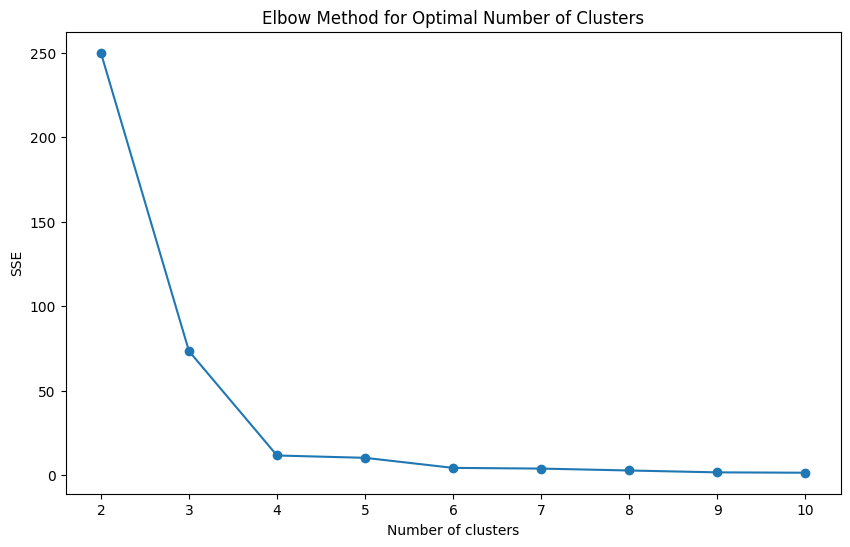

In [49]:
from sklearn.cluster import KMeans

sse = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(df)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()


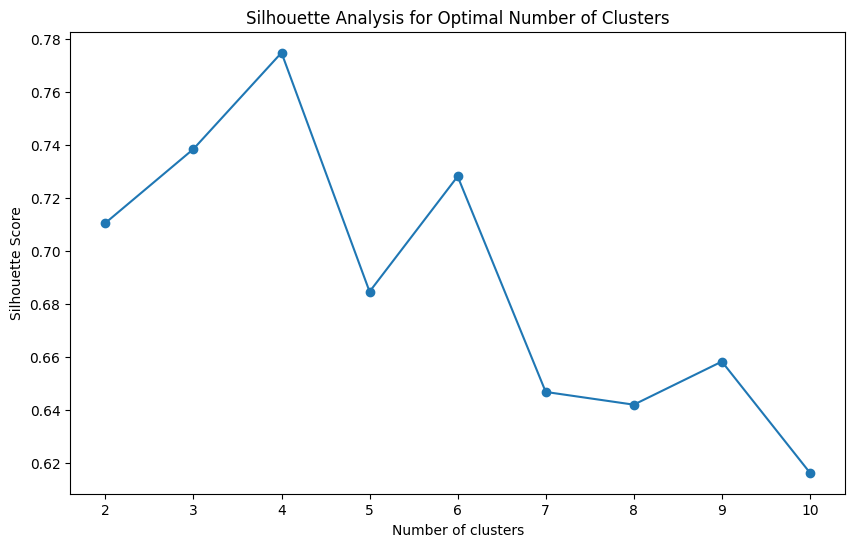

In [44]:
from sklearn.metrics import silhouette_score

silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(df)
    labels = kmeans.labels_
    silhouette_scores.append(silhouette_score(df, labels))

plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis for Optimal Number of Clusters')
plt.show()

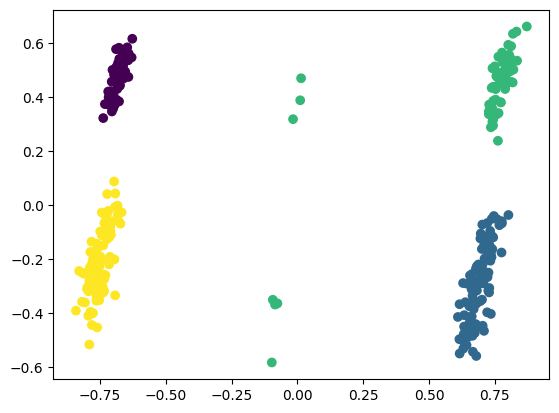

In [48]:
kmeans = KMeans(n_clusters=4)

cls = kmeans.fit(df)

df['Cluster'] = cls.labels_


plt.scatter(df['PCA1'],df['PCA2'],c=df['Cluster'])

plt.show()
